In [1]:
import numpy as np
import cv2

In [2]:
bgr_image = cv2.imread("sentinel-3b.2021269.0926.1543C.L3.SF3.v950V20193_1_2_x0-2.rbd_rhos.swfl.filt.tif") # Reads image as uint8 array

In [3]:
hsv = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)

In [4]:
import matplotlib.pyplot as plt

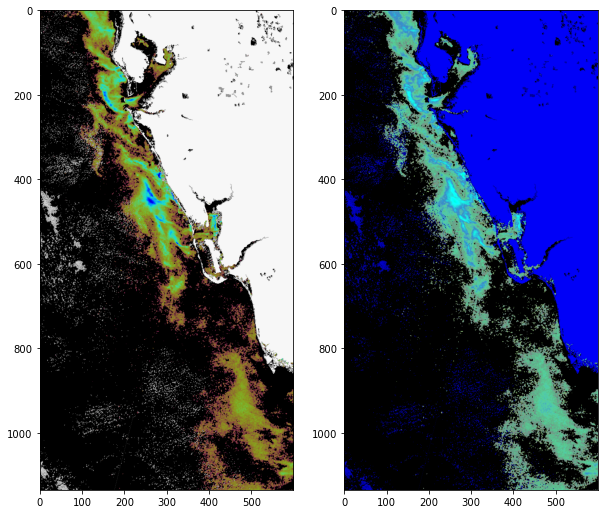

In [130]:
figure_size = 10
plt.figure(figsize=(figure_size, figure_size))

plt.subplot(1,2,1),plt.imshow(bgr_image) # This is the original image in OpenCV Blue-Green-Red format
plt.subplot(1,2,2),plt.imshow(hsv) # This is the image used for hsv filtering
plt.show()

In [135]:
# Global algae mask parameters
lower_global = np.array([2,0,0])
upper_global = np.array([150,255,255])

maskGlobal = cv2.inRange(hsv, lower_global, upper_global)
resGlobal = cv2.bitwise_or(bgr_image, bgr_image, mask=maskGlobal)

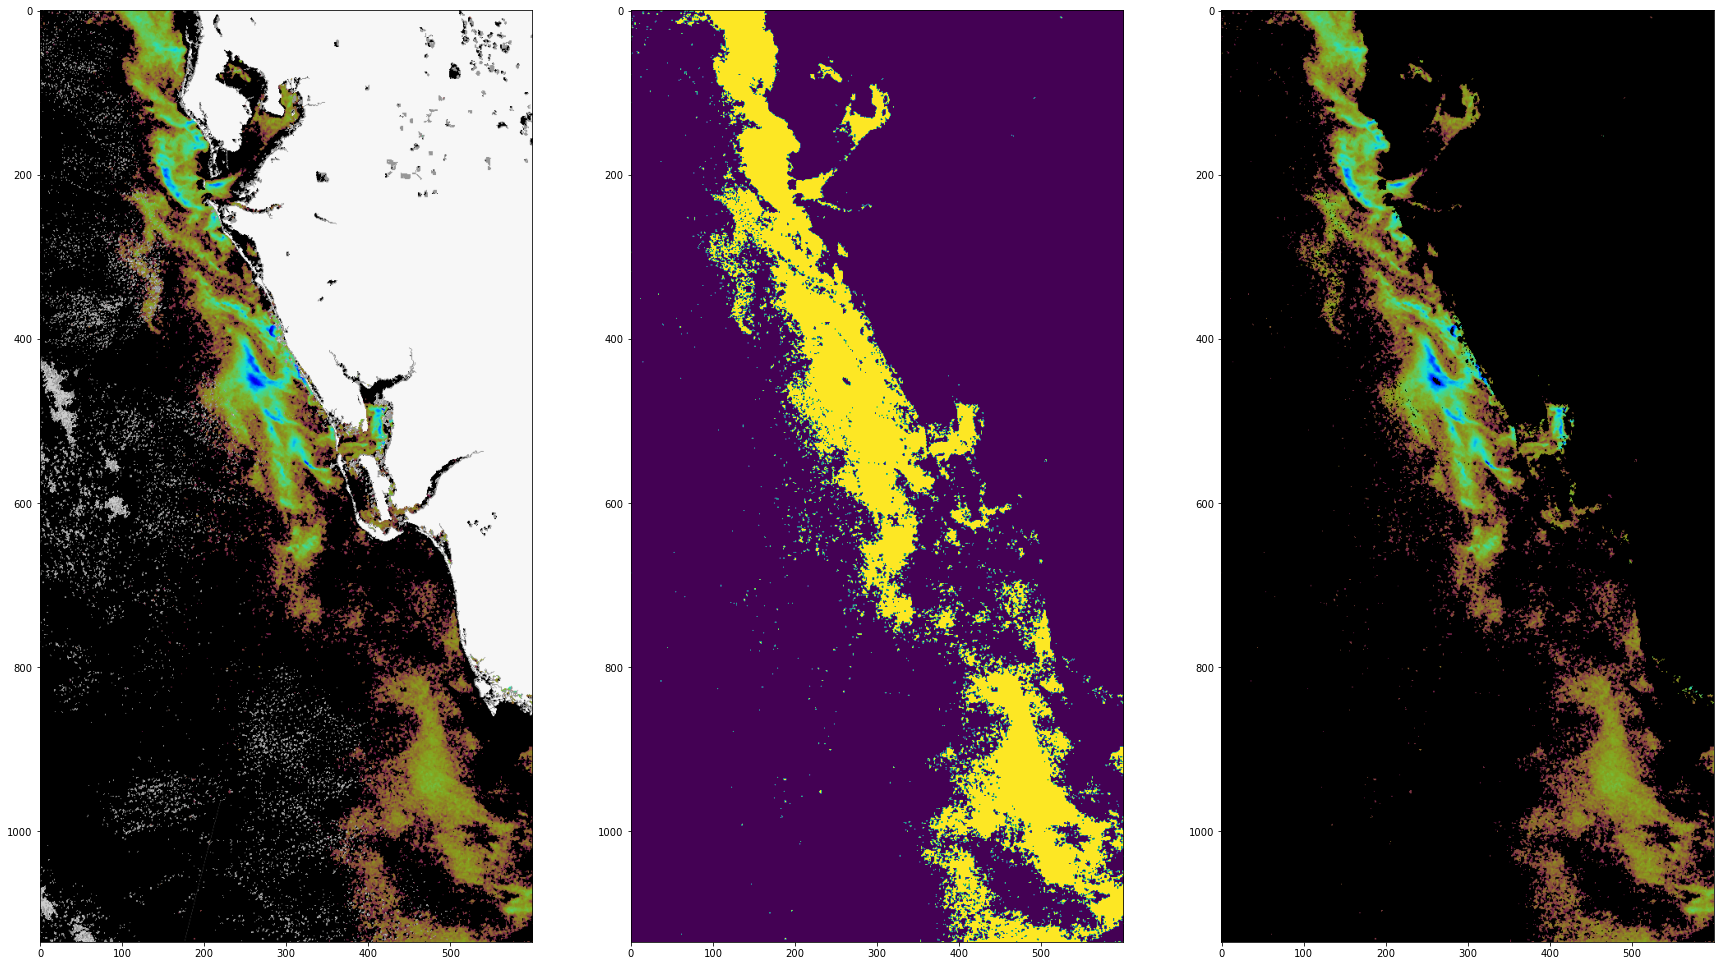

In [136]:
figure_size = 30
plt.figure(figsize=(figure_size, figure_size))
plt.subplot(1,3,1),plt.imshow(bgr_image) 
plt.subplot(1,3,2),plt.imshow(maskGlobal)
plt.subplot(1,3,3),plt.imshow(resGlobal)
plt.show()

In [174]:
gray_global = cv2.cvtColor(resGlobal, cv2.COLOR_BGR2GRAY)

# Returns ret which is the threshold used and outs which is the image
ret, outs_global = cv2.threshold(src = gray_global, thresh = 0, maxval = 255, type = cv2.THRESH_BINARY_INV)

print('The GLOBAL number of algae pixels is =', (outs_global.size - cv2.countNonZero(outs_global)))

The GLOBAL number of algae pixels is = 107404


In [128]:
# Creating a mask for only the most intense parts of the image
lower_intense = np.array([1,0,0])
upper_intense = np.array([33,255,255])

maskIntense = cv2.inRange(hsv, lower_intense, upper_intense)
resIntense = cv2.bitwise_or(bgr_image, bgr_image, mask=maskIntense)

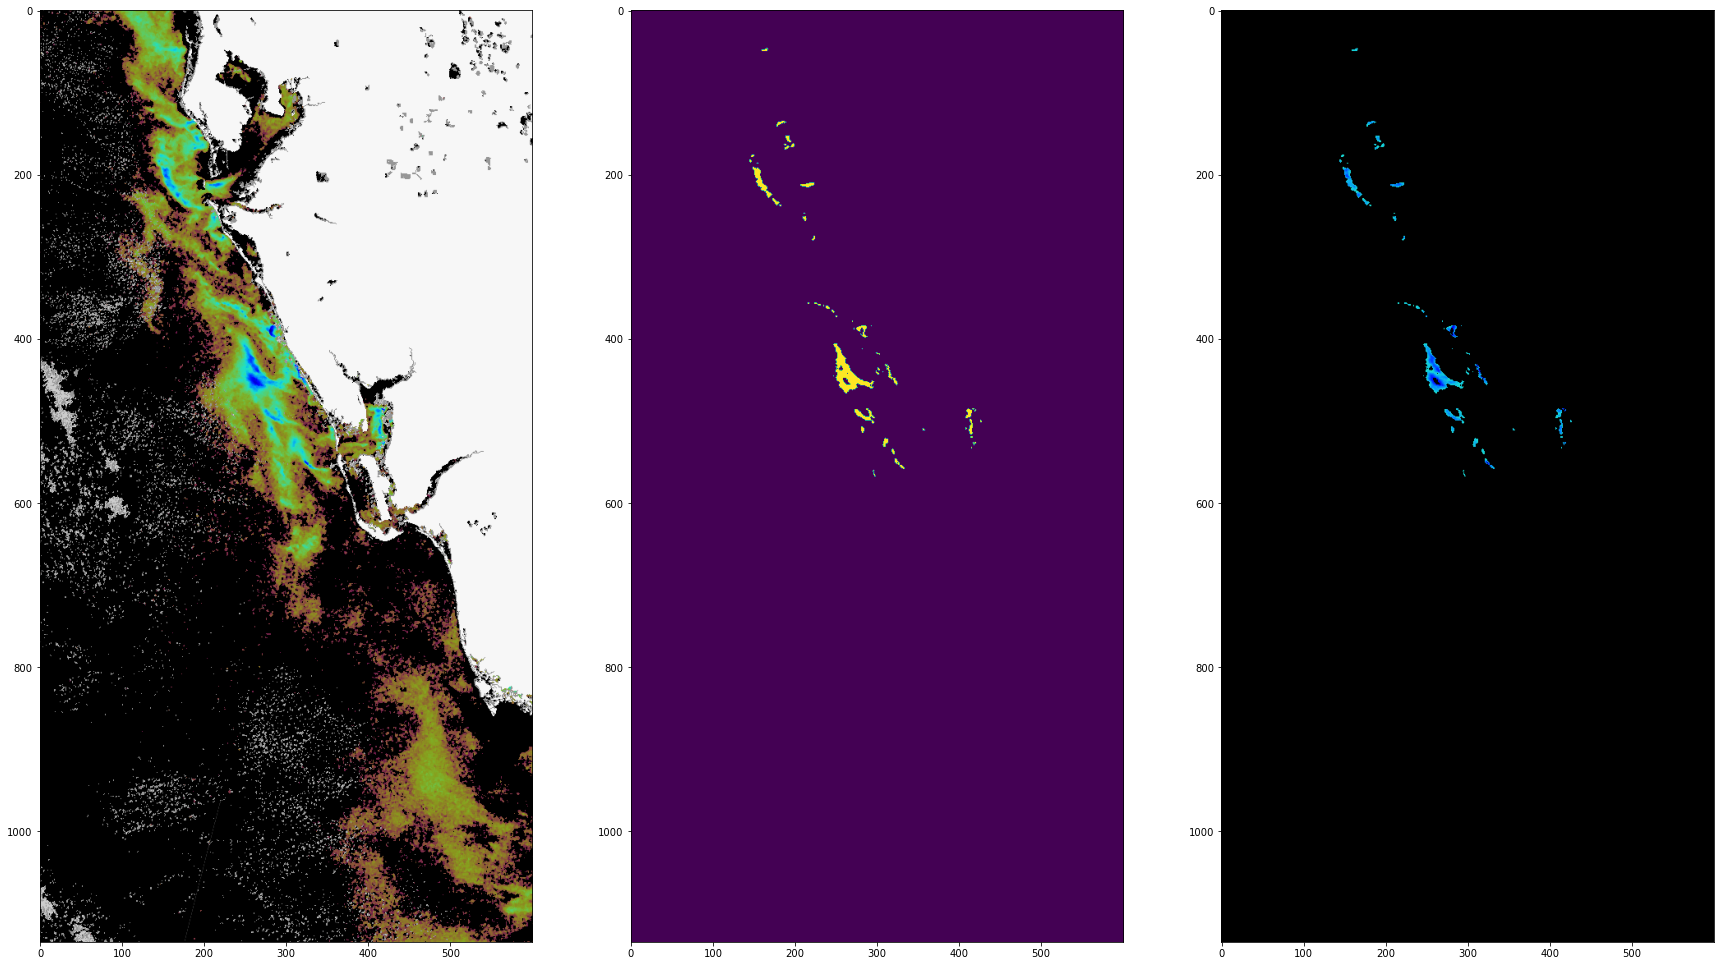

In [134]:
figure_size = 30
plt.figure(figsize=(figure_size, figure_size))
plt.subplot(1,3,1),plt.imshow(bgr_image) 
plt.subplot(1,3,2),plt.imshow(maskIntense)
plt.subplot(1,3,3),plt.imshow(resIntense)
plt.show()

In [171]:
gray_intense = cv2.cvtColor(resIntense, cv2.COLOR_BGR2GRAY)

# Returns ret which is the threshold used and outs which is the image
ret, outs_intense = cv2.threshold(src = gray_intense, thresh = 0, maxval = 255, type = cv2.THRESH_BINARY_INV)

print('The number of INTENSE algae pixels is =', (outs_intense.size - cv2.countNonZero(outs_intense)))

The number of INTENSE algae pixels is = 2167


In [177]:
print('The percent of the algal bloom that is intense is =', ((outs_intense.size - cv2.countNonZero(outs_intense)) / (outs_global.size - cv2.countNonZero(outs_global))) * 100)

The percent of the algal bloom that is intense is = 2.0176157312576812
